In [1]:
using MLJ
import Flux
using MLJFlux
using CategoricalArrays

┌ Info: Recompiling stale cache file /home/ayush99/.julia/compiled/v1.1/MLJ/rAU56.ji for MLJ [add582a8-e3ab-11e8-2d5e-e98b27df1bc7]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/ayush99/.julia/compiled/v1.1/MLJFlux/fHjkl.ji for MLJFlux [094fc8d1-fd35-5302-93ea-dabda2abf845]
└ @ Base loading.jl:1184


Loading the boston dataset:

In [2]:
task = load_boston()
X_, y_ = task();

Standardizing the inputs:

In [3]:
ustand_model = UnivariateStandardizer()
ustand = machine(ustand_model, y_)
fit!(ustand)
y = transform(ustand, y_);

┌ Info: Training Machine{UnivariateStandardizer} @ 2…49.
└ @ MLJ /home/ayush99/.julia/dev/MLJ/src/machines.jl:130


In [4]:
stand_model = Standardizer()
stand = machine(stand_model, X_)
fit!(stand)
X = transform(stand, X_);

┌ Info: Training Machine{Standardizer} @ 9…66.
└ @ MLJ /home/ayush99/.julia/dev/MLJ/src/machines.jl:130


Implementing a small NN 

In [13]:
builder = MLJFlux.Short()
optimiser = Flux.Momentum(0.003)
nnmodel = NeuralNetworkRegressor(builder=builder, optimiser=optimiser)

NeuralNetworkRegressor(builder = Short{} @ 1…14,
                       optimiser = Flux.Optimise.Momentum(0.003, 0.9, IdDict{Any,Any}()),
                       loss = Flux.mse,
                       n = 10,
                       batch_size = 1,
                       lambda = 0.0,
                       alpha = 0.0,
                       optimiser_changes_trigger_retraining = false,) @ 5…65

In [14]:
fitresult, cache, report = MLJ.fit(nnmodel, 2, X, y);

Loss is 578.8946527063584
Loss is 522.3698119542399
Loss is 529.8241578172281
Loss is 461.97008764570865
Loss is 463.0274592913024
Loss is 406.3109550431108
Loss is 380.0925931998502
Loss is 426.39846902909335
Loss is 406.5012867167901
Loss is 384.3981816169468


In [11]:
model = NeuralNetworkRegressor(builder=builder, optimiser=optimiser, n =20)

NeuralNetworkRegressor(builder = Short{} @ 1…11,
                       optimiser = Flux.Optimise.Momentum(0.003, 0.9, IdDict{Any,Any}()),
                       loss = Flux.mse,
                       n = 20,
                       batch_size = 1,
                       lambda = 0.0,
                       alpha = 0.0,
                       optimiser_changes_trigger_retraining = false,) @ 9…86

In [12]:
fitresult_new, cache_new, report_new = MLJ.update(model, 2, fitresult, cache, X, y)

Loss is 407.3300088810131
Loss is 364.7834471244176
Loss is 420.30522018002824
Loss is 435.2097666951982
Loss is 362.9675558876044
Loss is 374.33056646166085
Loss is 321.15864335763627
Loss is 421.98317275407527
Loss is 380.92586582559034
Loss is 340.0498469946497


((Chain(Dense(12, 3, NNlib.σ), Flux.Dropout{Float64}(0.5, Colon(), false), Dense(3, 1)), false), (NeuralNetworkRegressor{} @ 1…31, Tuple{Array{Float64,2},Array{Float64,1}}[([-0.419367; 0.284548; … ; 0.440616; -1.0745], [0.159528]), ([-0.416927; -0.48724; … ; 0.440616; -0.491953], [-0.101424]), ([-0.416929; -0.48724; … ; 0.396035; -1.20753], [1.32294]), ([-0.416338; -0.48724; … ; 0.415751; -1.36017], [1.18159]), ([-0.412074; -0.48724; … ; 0.440616; -1.02549], [1.48603]), ([-0.416631; -0.48724; … ; 0.410165; -1.04229], [0.670558]), ([-0.409837; 0.048724; … ; 0.426376; -0.0312367], [0.0399249]), ([-0.403297; 0.048724; … ; 0.440616; 0.9098], [0.49659]), ([-0.395543; 0.048724; … ; 0.328123; 2.41938], [-0.655946]), ([-0.400333; 0.048724; … ; 0.329; 0.622728], [-0.394995])  …  ([-0.386433; -0.48724; … ; 0.440616; 1.18847], [-0.308011]), ([-0.3889; -0.48724; … ; 0.440616; 0.202622], [-0.460233]), ([-0.392302; -0.48724; … ; 0.440616; 0.0373805], [-0.144916]), ([-0.399427; -0.48724; … ; 0.428238

Defining our own NN:

In [25]:
struct mynn <: MLJFlux.Builder
    d1
    d2
end

function MLJFlux.fit(nn::mynn, a, b)
    return Flux.Chain(Flux.Dense(a, nn.d1), Flux.Dense(nn.d1, nn.d2), Flux.Dense(nn.d2, b))
end

In [28]:
optimiser = Flux.Momentum(0.00003)
builder = mynn(3, 4)
nnmodel = NeuralNetworkRegressor(builder=builder, optimiser=optimiser)

NeuralNetworkRegressor(builder = mynn{} @ 6…99,
                       optimiser = Flux.Optimise.Momentum(3.0e-5, 0.9, IdDict{Any,Any}()),
                       loss = Flux.mse,
                       n = 10,
                       batch_size = 1,
                       lambda = 0.0,
                       alpha = 0.0,
                       optimiser_changes_trigger_retraining = false,) @ 4…70

In [29]:
fitresult, cache, report = MLJ.fit(nnmodel, 2, X, y);

Loss is 364.4814569413559
Loss is 278.63231647769413
Loss is 235.69849498109986
Loss is 213.50896526621412
Loss is 200.82036709841546
Loss is 192.3304622194287
Loss is 185.96632319587954
Loss is 180.8950639185371
Loss is 176.7181708714614
Loss is 173.20630295175266


┌ Info: Training Machine{DeterministicTunedModel} @ 1…74.
└ @ MLJ /home/ayush99/.julia/dev/MLJ/src/machines.jl:130
Iterating over a 30-point grid: 100%[=========================] Time: 0:00:03
┌ Info: Not retraining Machine{DeterministicTunedModel} @ 1…74.
│  It appears up-to-date. Use force=true to force retraining.
└ @ MLJ /home/ayush99/.julia/dev/MLJ/src/machines.jl:136
┌ Info: Not retraining Machine{DeterministicTunedModel} @ 1…74.
│  It appears up-to-date. Use force=true to force retraining.
└ @ MLJ /home/ayush99/.julia/dev/MLJ/src/machines.jl:136
┌ Info: Not retraining Machine{DeterministicTunedModel} @ 1…74.
│  It appears up-to-date. Use force=true to force retraining.
└ @ MLJ /home/ayush99/.julia/dev/MLJ/src/machines.jl:136
┌ Info: Recompiling stale cache file /home/ayush99/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading

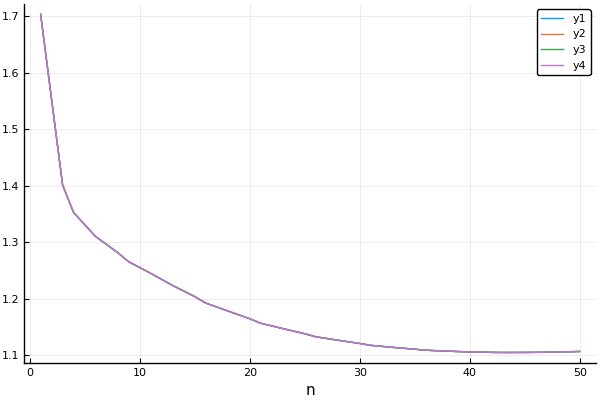

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _update_plot_object(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1304
└ @ Plots /home/ayush99/.julia/packages/Plots/gylTh/src/backends/pyplot.jl:1304
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _show(::Base64.Base64EncodePipe, ::MIME{Symbol("image/png")}, ::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1343
└ @ Plots /home/ayush99/.julia/packages/Plots/gylTh/src/backends/pyplot.jl:1343
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _show(::Base64.Base64EncodePipe, ::MIME{Symbol("image/png")}, ::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1343
└ @ Plots /home/ayush99/.julia/packages/Plots/gylTh/src/backends/pyp

In [31]:
# learning curves:
nn = machine(nnmodel, X, y)
r = range(nnmodel, :n, lower=1, upper=50)
curve = learning_curve!(nn, nested_range=(n=r,), n=4)

using Plots
pyplot()

plot(curve.parameter_values, curve.measurements,
     xlab=curve.parameter_name)